In [7]:
%matplotlib inline
import numpy as np
import sympy as sym
from sympy import init_printing
init_printing(use_latex=True)
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt

Burgers' equation in one dimension looks like:

$$
\dfrac{\partial u}{\partial t} + u \dfrac{\partial u}{\partial x} = \nu \dfrac{\partial^2 u}{\partial x^2}
$$

Rearranging the discretizations used before, the equation looks like:

$$
\dfrac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t}+u\dfrac{u^{n}_{i}-u^{n}_{i-1}}{\Delta x} =\nu \dfrac{u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1}}{\Delta x^2}
$$

The only unknown in this problem is $u_i^{n+1}$. Solving for it:

$$
u^{n+1}_{i}=u^n_i-u^n_i\dfrac{\Delta t}{\Delta x} \left( u^{n}_{i}-u^{n}_{i-1} \right) + \dfrac{\nu  \Delta t}{\Delta x^2} \left( {u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1}} \right)
$$

The initial condition for this case will be: 

$$
u = - \dfrac{2\nu}{\phi}\dfrac{\partial \phi}{\partial x}+4 \quad \text{ where } \phi = \exp \left( -\dfrac{x^2}{4\nu} \right) + \exp \left( -\dfrac{(x-2\pi)^2}{4\nu} \right)
$$

The boundary condition is given by the periodic relation:

$$
u(0) = u(2\pi)
$$

The initial condition given has an analytical solution, given by:

$$
u = - \dfrac{2\nu}{\phi}\dfrac{\partial \phi}{\partial x}+4 \quad \text{ where } \phi = \exp \left( -\dfrac{(x-4t)^2}{4\nu(t+1)} \right) + \exp \left( -\dfrac{(x-4t-2\pi)^2}{4\nu(t+1)} \right)
$$

In [17]:
x, nu, t = sym.symbols('x nu t')
phi = (sym.exp(-(x-4*t)**2/(4*nu*(t+1)))+sym.exp(-(x-4*t-2*np.pi)**2/(4*nu*(t+1))))
phi

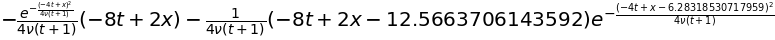

In [18]:
phiprime = phi.diff(x)
phiprime

In [19]:
u = -2 * nu * (phiprime/phi) + 4
ufunc = lambdify((t,x,nu),u)
print(ufunc(1,4,3))

3.49170664206


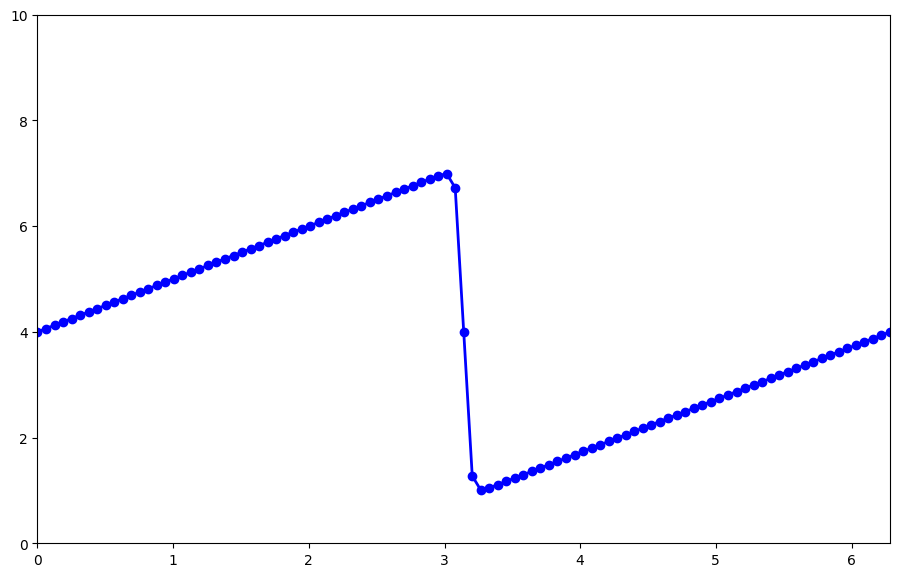

In [43]:
nx = 101
nt = 100
dx = 2*np.pi/(nx-1)
nu = 0.07
dt = dx*nu

x = np.linspace(0,2*np.pi,nx)
un = np.zeros(nx)
t = 0

u = np.asarray([ufunc(t,x0,nu) for x0 in x])

plt.figure(figsize=(11,7), dpi=100)
plt.plot(x, u, 'bo-', lw=2)
plt.xlim([0,2*np.pi])
plt.ylim([0,10])
plt.show()

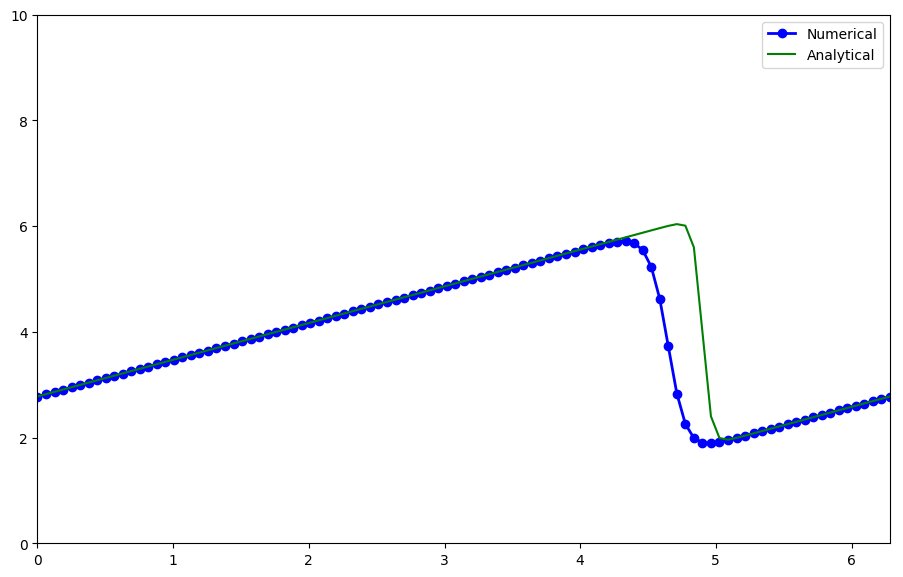

In [44]:
for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i] = un[i] - un[i] *dt/dx*(un[i]-un[i-1]) + nu*dt/dx**2*(un[i+1]-2*un[i]+un[i-1])
    u[0] = un[0] - un[0] *dt/dx*(un[0]-un[-2]) + nu*dt/dx**2*(un[1]-2*un[0]+un[-2])
    u[-1] = u[0]
    
u_analytical = np.asarray([ufunc(nt*dt,xi,nu) for xi in x])

plt.figure(figsize=(11,7), dpi=100)
plt.plot(x,u, 'bo-', lw=2, label='Numerical')
plt.plot(x,u_analytical, 'g', label='Analytical')
plt.xlim([0,2*np.pi])
plt.ylim([0,10])
plt.legend()